In [54]:
from sklearn.utils import _pprint
print("Module loaded successfully!")

Module loaded successfully!


In [55]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import sklearn
print(sklearn.__version__)
import xgboost
print(xgboost.__version__)
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

1.6.1
2.1.3


In [57]:
df = pd.read_csv(r"D:\final_year_project\train.csv")
df.head()

,YEAR,MO,DY,HR,TEMP,HUMIDITY
0,2001,1,1,0,20.70,13.35
1,2001,1,1,1,20.41,13.31
2,2001,1,1,2,20.06,13.24
3,2001,1,1,3,19.76,13.15
4,2001,1,1,4,19.50,13.06


### Create datetime index

In [58]:
df['datetime'] = pd.to_datetime(df[['YEAR', 'MO', 'DY', 'HR']].assign(
    YEAR=df.YEAR.astype(str),
    MO=df.MO.astype(str).str.zfill(2),
    DY=df.DY.astype(str).str.zfill(2),
    HR=df.HR.astype(str).str.zfill(2)
).agg('-'.join, axis=1) + ':00')

df = df.set_index('datetime')
df.head()

,YEAR,MO,DY,HR,TEMP,HUMIDITY
datetime,,,,,,
2001-01-01 00:00:00,2001,1,1,0,20.70,13.35
2001-01-01 01:00:00,2001,1,1,1,20.41,13.31
2001-01-01 02:00:00,2001,1,1,2,20.06,13.24
2001-01-01 03:00:00,2001,1,1,3,19.76,13.15
2001-01-01 04:00:00,2001,1,1,4,19.50,13.06


### Feature Engineering

In [59]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
df['day_sin'] = np.sin(2 * np.pi * df['day']/31)
df['day_cos'] = np.cos(2 * np.pi * df['day']/31)
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
df

,YEAR,MO,DY,HR,TEMP,HUMIDITY,hour,day,month,year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
datetime,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,2001,1,1,0,20.70,13.35,0,1,1,2001,0.000000,1.000000,2.012985e-01,0.97953,5.000000e-01,0.866025
2001-01-01 01:00:00,2001,1,1,1,20.41,13.31,1,1,1,2001,0.258819,0.965926,2.012985e-01,0.97953,5.000000e-01,0.866025
2001-01-01 02:00:00,2001,1,1,2,20.06,13.24,2,1,1,2001,0.500000,0.866025,2.012985e-01,0.97953,5.000000e-01,0.866025
2001-01-01 03:00:00,2001,1,1,3,19.76,13.15,3,1,1,2001,0.707107,0.707107,2.012985e-01,0.97953,5.000000e-01,0.866025
2001-01-01 04:00:00,2001,1,1,4,19.50,13.06,4,1,1,2001,0.866025,0.500000,2.012985e-01,0.97953,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,2024,12,31,19,25.01,14.50,19,31,12,2024,-0.965926,0.258819,-2.449294e-16,1.00000,-2.449294e-16,1.000000
2024-12-31 20:00:00,2024,12,31,20,24.43,14.64,20,31,12,2024,-0.866025,0.500000,-2.449294e-16,1.00000,-2.449294e-16,1.000000
2024-12-31 21:00:00,2024,12,31,21,23.82,14.85,21,31,12,2024,-0.707107,0.707107,-2.449294e-16,1.00000,-2.449294e-16,1.000000


### Prepare data for training

In [60]:
FEATURES = ['hour', 'day', 'month', 'year', 
           'hour_sin', 'hour_cos', 
           'day_sin', 'day_cos',
           'month_sin', 'month_cos']
TARGET = 'TEMP'

X = df[FEATURES]
y = df[TARGET]

### Split the data

In [61]:
train_size = int(len(df) * 0.8)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]
import xgboost
print(xgboost.__version__)

2.1.3


### Train XGBOOST model

In [62]:
reg = xgb.XGBRegressor(
    base_score=0.5,
    booster='gbtree',
    n_estimators=500,
    learning_rate=0.15,
    max_depth=10,
    min_child_weight=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.5,
    reg_alpha=0,
    reg_lambda=1,
    objective='reg:squarederror',
    early_stopping_rounds=50,
    random_state=69
)


reg.fit(
    X_train, 
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=100
)

[0]	validation_0-rmse:23.83471	validation_1-rmse:23.74058
[73]	validation_0-rmse:0.81150	validation_1-rmse:1.94530


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=69, ...)

In [63]:
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

In [64]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train RMSE: 1.3529
Test RMSE: 1.7445


In [65]:
print(y_train)
print("-----------------------")
print(y_test)
print("------------------------")

datetime
2001-01-01 00:00:00    20.70
2001-01-01 01:00:00    20.41
2001-01-01 02:00:00    20.06
2001-01-01 03:00:00    19.76
2001-01-01 04:00:00    19.50
                       ...  
2020-03-14 14:00:00    37.62
2020-03-14 15:00:00    36.09
2020-03-14 16:00:00    33.92
2020-03-14 17:00:00    31.05
2020-03-14 18:00:00    28.86
Name: TEMP, Length: 168307, dtype: float64
-----------------------
datetime
2020-03-14 19:00:00    27.51
2020-03-14 20:00:00    26.45
2020-03-14 21:00:00    25.58
2020-03-14 22:00:00    24.85
2020-03-14 23:00:00    24.18
                       ...  
2024-12-31 19:00:00    25.01
2024-12-31 20:00:00    24.43
2024-12-31 21:00:00    23.82
2024-12-31 22:00:00    23.02
2024-12-31 23:00:00    22.22
Name: TEMP, Length: 42077, dtype: float64
------------------------


### Forecast for the next 30 days


### Plotting the results

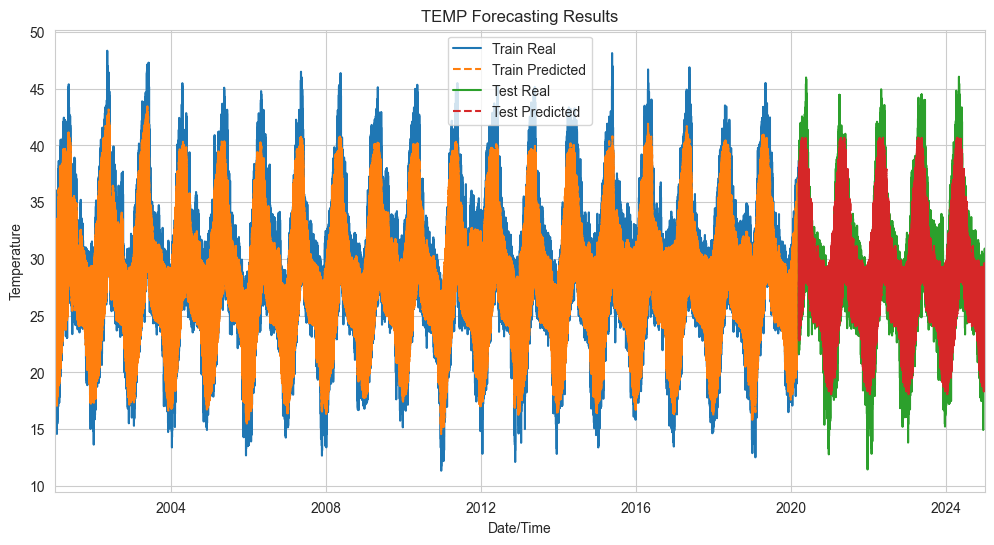

In [82]:
import datetime

plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], y_train, label='Train Real')
plt.plot(df.index[:train_size], train_preds, label='Train Predicted', linestyle='--')

plt.plot(df.index[train_size:], y_test, label='Test Real')
plt.plot(df.index[train_size:], test_preds, label='Test Predicted', linestyle='--')

plt.title("TEMP Forecasting Results")
plt.xlabel("Date/Time")
plt.ylabel("Temperature")
plt.legend()

# Convert strings to datetime objects
start_date = datetime.datetime(2001, 1, 1)
end_date = datetime.datetime(2024, 12, 31)
plt.xlim([start_date, end_date])

plt.show()


In [67]:
# Generate future dates for forecasting (next 20 days)
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + timedelta(hours=1), 
                           periods=24*30,  # 30 days * 24 hours
                           freq='H')

C:\Users\LENOVO L460\AppData\Local\Temp\ipykernel_13572\2608359935.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=last_date + timedelta(hours=1),


In [68]:
future_df = pd.DataFrame(index=future_dates)
future_df['hour'] = future_df.index.hour
future_df['day'] = future_df.index.day
future_df['month'] = future_df.index.month
future_df['year'] = future_df.index.year
future_df['hour_sin'] = np.sin(2 * np.pi * future_df['hour']/24)
future_df['hour_cos'] = np.cos(2 * np.pi * future_df['hour']/24)
future_df['day_sin'] = np.sin(2 * np.pi * future_df['day']/31)
future_df['day_cos'] = np.cos(2 * np.pi * future_df['day']/31)
future_df['month_sin'] = np.sin(2 * np.pi * future_df['month']/12)
future_df['month_cos'] = np.cos(2 * np.pi * future_df['month']/12)

# Make predictions for future dates
future_predictions = reg.predict(future_df[FEATURES])

In [69]:
# Create DataFrame with predictions
forecast_df = pd.DataFrame({
    'datetime': future_dates,
    'predicted_temp': future_predictions
}).set_index('datetime')


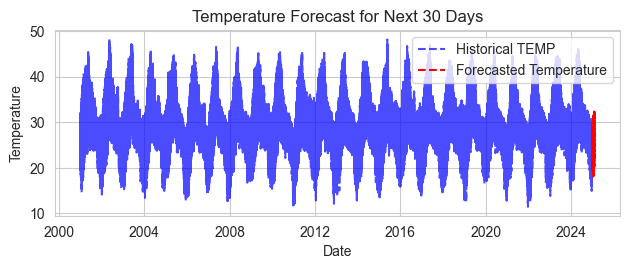

In [70]:
# Plot forecasts
plt.subplot(2, 1, 2)
plt.plot(df.index, df['TEMP'], label='Historical TEMP', color='blue', alpha=0.7,linestyle='--')
plt.plot(forecast_df.index, forecast_df['predicted_temp'], 
         label='Forecasted Temperature', color='red', linestyle='--')
plt.title('Temperature Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [71]:
# Print forecast statistics
print("\nForecast Statistics:")
print(f"Mean Temperature: {forecast_df['predicted_temp'].mean():.2f}")
print(f"Max Temperature: {forecast_df['predicted_temp'].max():.2f}")
print(f"Min Temperature: {forecast_df['predicted_temp'].min():.2f}")

# Print hourly forecasts for the first day
print("\nHourly Forecasts for next 30 days:")
print(forecast_df)

# Save forecasts to CSV
forecast_df.to_csv('temperature_data.csv')


Forecast Statistics:
Mean Temperature: 24.25
Max Temperature: 32.30
Min Temperature: 18.07

Hourly Forecasts for next 30 days:
                     predicted_temp
datetime                           
2025-01-01 00:00:00       20.541773
2025-01-01 01:00:00       20.383471
2025-01-01 02:00:00       20.152905
2025-01-01 03:00:00       20.065125
2025-01-01 04:00:00       19.966547
...                             ...
2025-01-30 19:00:00       24.293602
2025-01-30 20:00:00       23.786345
2025-01-30 21:00:00       23.262272
2025-01-30 22:00:00       22.623089
2025-01-30 23:00:00       21.994398

[720 rows x 1 columns]


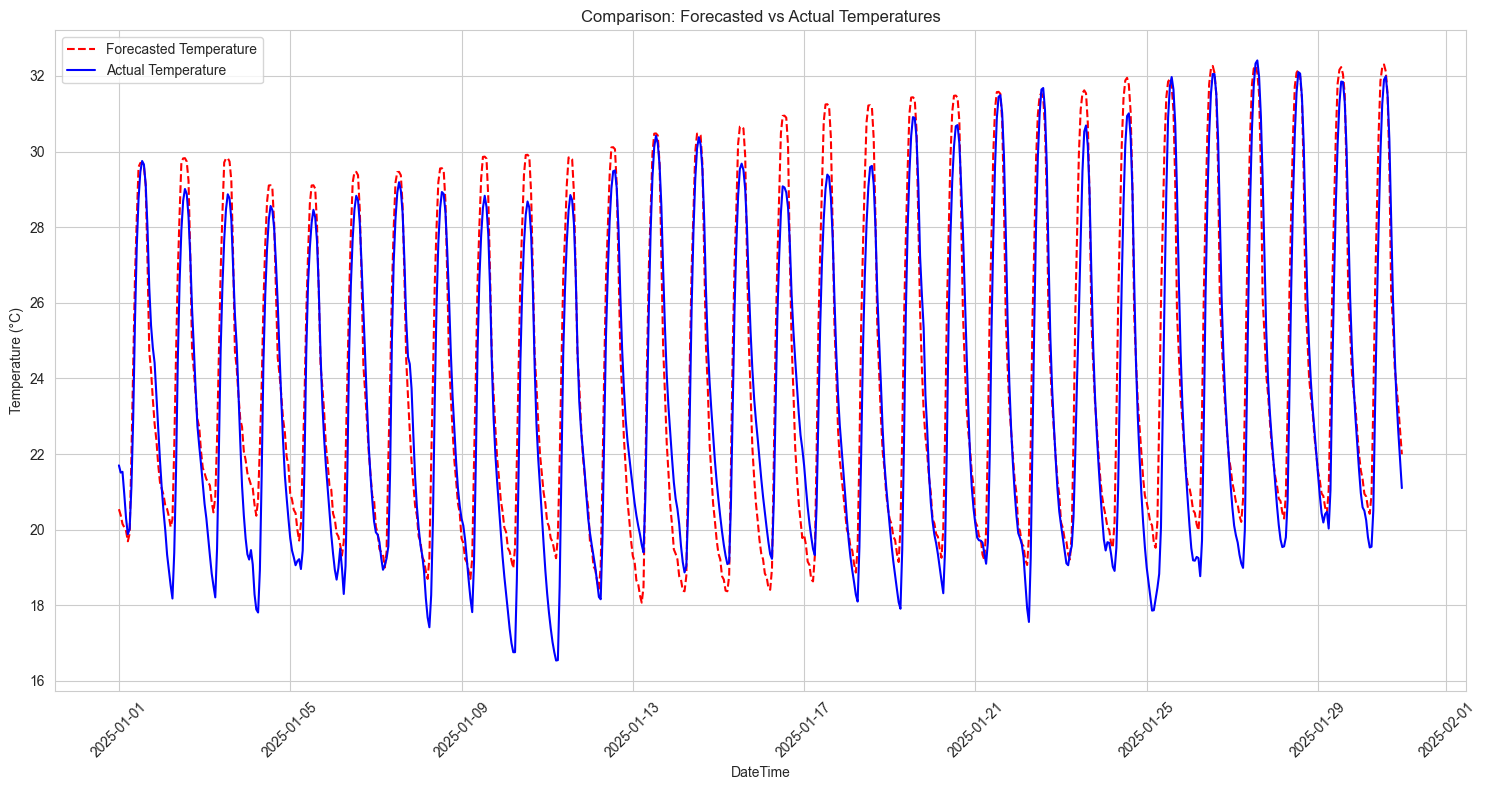

In [72]:
# Import the new temperature data
file_path = r'D:\final_year_project\test.csv'
new_temps = pd.read_csv(file_path)

new_temps['datetime'] = pd.to_datetime(new_temps[['YEAR', 'MO', 'DY', 'HR']].assign(
    YEAR=new_temps.YEAR.astype(str),
    MO=new_temps.MO.astype(str).str.zfill(2),
    DY=new_temps.DY.astype(str).str.zfill(2),
    HR=new_temps.HR.astype(str).str.zfill(2)
).agg('-'.join, axis=1) + ':00')

new_temps = new_temps.set_index('datetime')

# Ensure the time periods match
forecast_subset = forecast_df
actual_subset = new_temps

# Create comparison plot
plt.figure(figsize=(15, 8))

# Plot both forecasted and actual temperatures
plt.plot(forecast_subset.index, forecast_subset['predicted_temp'], 
         label='Forecasted Temperature', 
         color='red', 
         linestyle='--')
plt.plot(actual_subset.index, actual_subset['TEMP'],  # Adjust column name if different
         label='Actual Temperature', 
         color='blue')

# Customize the plot
plt.title('Comparison: Forecasted vs Actual Temperatures')
plt.xlabel('DateTime')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


In [73]:
# Calculate and print comparison metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

comparison_metrics = {
    'RMSE': np.sqrt(mean_squared_error(actual_subset['TEMP'], forecast_subset['predicted_temp'])),
    'MAE': mean_absolute_error(actual_subset['TEMP'], forecast_subset['predicted_temp']),
    'R2': r2_score(actual_subset['TEMP'], forecast_subset['predicted_temp'])
}

print("\nComparison Metrics:")
for metric, value in comparison_metrics.items():
    print(f"{metric}: {value:.4f}")

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': actual_subset['TEMP'],
    'Forecasted': forecast_subset['predicted_temp'],
    'Difference': actual_subset['TEMP'] - forecast_subset['predicted_temp']
})

print("\nHourly Comparison:")
print(comparison_df)



Comparison Metrics:
RMSE: 1.4775
MAE: 1.1647
R2: 0.8740

Hourly Comparison:
                     Actual  Forecasted  Difference
datetime                                           
2025-01-01 00:00:00   21.70   20.541773    1.158227
2025-01-01 01:00:00   21.51   20.383471    1.126529
2025-01-01 02:00:00   21.53   20.152905    1.377095
2025-01-01 03:00:00   20.94   20.065125    0.874875
2025-01-01 04:00:00   20.30   19.966547    0.333453
...                     ...         ...         ...
2025-01-30 19:00:00   24.61   24.293602    0.316398
2025-01-30 20:00:00   23.46   23.786345   -0.326345
2025-01-30 21:00:00   22.60   23.262272   -0.662272
2025-01-30 22:00:00   21.84   22.623089   -0.783089
2025-01-30 23:00:00   21.10   21.994398   -0.894398

[720 rows x 3 columns]


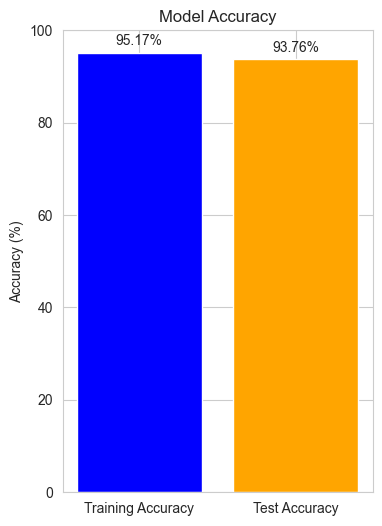

In [74]:
import matplotlib.pyplot as plt

# Define the accuracies and their labels
accuracies = [accuracy_train, accuracy_test]
labels = ['Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(4, 6))
bars = plt.bar(labels, accuracies, color=['blue', 'orange'])

# Add accuracy values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.2f}%', 
             ha='center', va='bottom')

plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.ylim(0, 100)  # Set y-axis from 0% to 100%
plt.show()
